In [123]:
# STEP1: IMPORTING THE LIBRARIES
import pandas as pd                 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

# STEP2: IMPORTING THE DATASET
df = pd.read_csv('TimeWasters.csv')
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


# HANDLING NULL VALUES/MISSING VALUES

In [124]:
df.isnull().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

# CHECKING FOR DUPLICATE RECORDS

In [125]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType


# HANDLING DUPLICATE RECORDS

In [126]:
df.drop_duplicates(inplace=True) 

In [127]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType


# ENCODING CATEGORICAL VARIABLES

In [128]:
categorical_columns = ['Gender', 'Debt', 'Video Category', 'Frequency', 'Platform']
for col in categorical_columns:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# CHECKING FOR OUTLIERS

In [129]:
df.shape       #returns the dimensions of the dataset, i.e., the number of rows and columns
df.describe()  #statistical summary of the numerical columns in the dataset.
df.info()      #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int32 
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   int32 
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   int32 
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   int32 
 14  Video Length             

<Axes: xlabel='Age'>

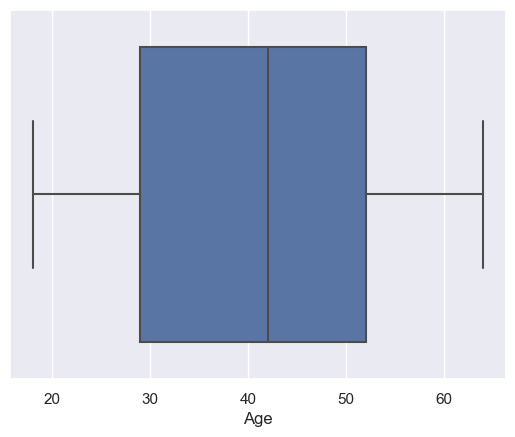

In [130]:
sns.boxplot(x=df['Age'])  #boxplot using Seaborn for the Age column.

<Axes: xlabel='Number of Sessions'>

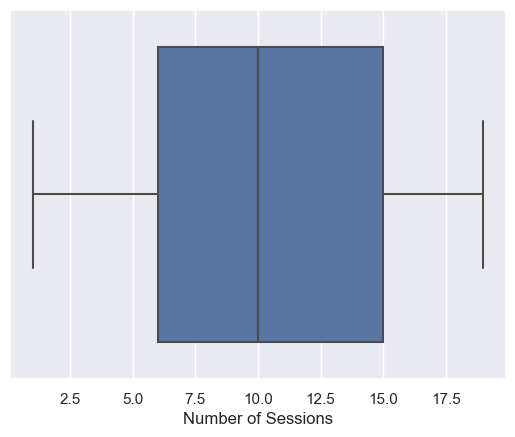

In [131]:
sns.boxplot(x=df['Number of Sessions'])  #boxplot using Seaborn for the Number of Sessions column.

<Axes: xlabel='Video Length'>

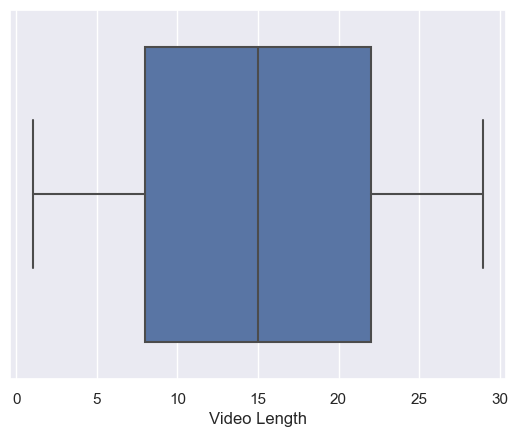

In [132]:
sns.boxplot(x=df['Video Length'])  #boxplot using Seaborn for the Video Length column.

<Axes: xlabel='Engagement'>

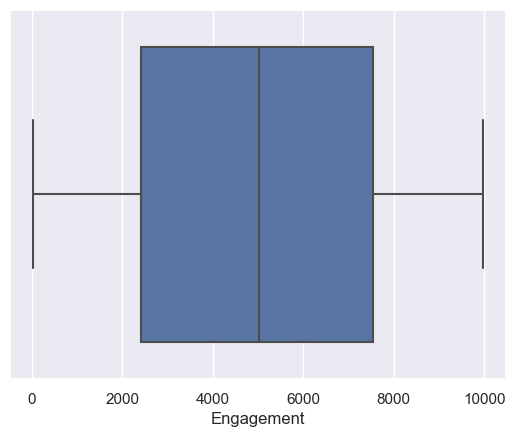

In [133]:
sns.boxplot(x=df['Engagement'])  #boxplot using Seaborn for the Engagement column.

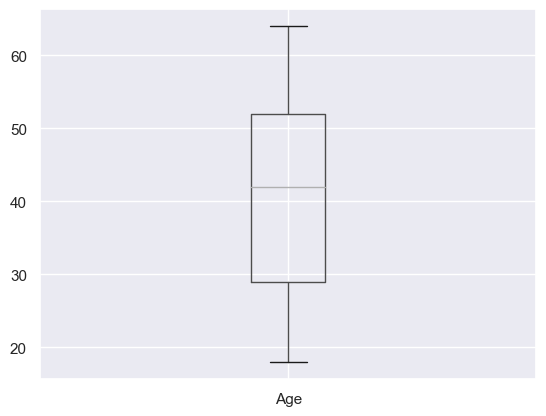

In [134]:
#To check for outliers, we will be plotting the box plots.
df.boxplot(column=['Age'])
plt.show()

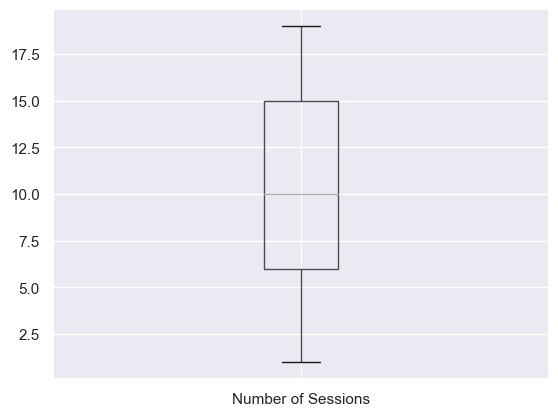

In [135]:
df.boxplot(column=['Number of Sessions'])
plt.show()

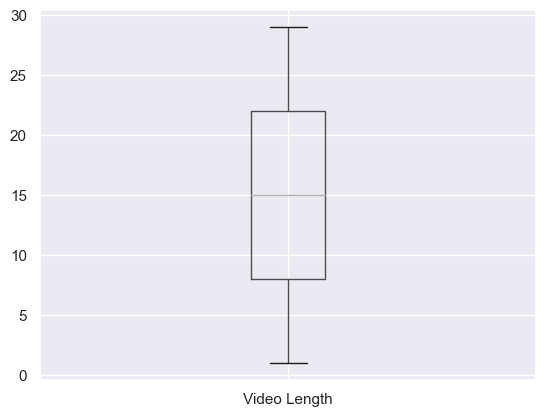

In [136]:
df.boxplot(column=['Video Length'])
plt.show()

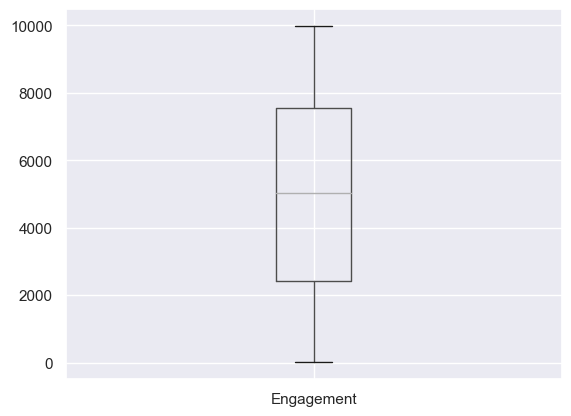

In [137]:
df.boxplot(column=['Engagement'])
plt.show()

# HANDLING OUTLIERS - OUTLIER TREATMENT

1. Drop the outlier value
2. Replace the outlier value using the IQR

# USING IQR

In [138]:
# Define the function to calculate IQR bounds
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range    

In [139]:
#List of columns to apply outlier treatment
outlier_columns = ['Age', 'Gender', 'Video Length', 'Engagement']

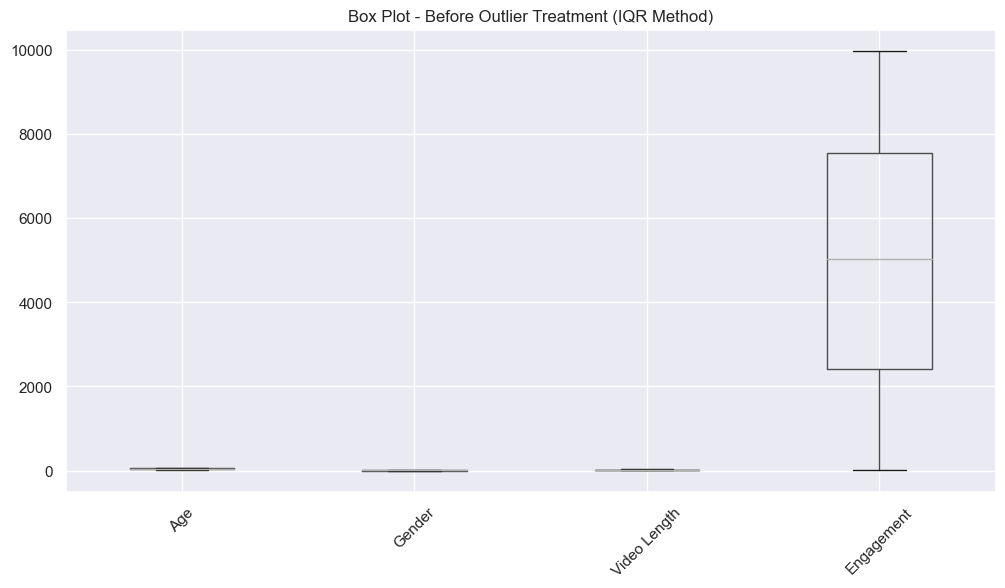

In [140]:
# Box Plot Before Outlier Treatment
plt.figure(figsize=(12, 6))
df[outlier_columns].boxplot()
plt.title("Box Plot - Before Outlier Treatment (IQR Method)")
plt.xticks(rotation=45)
plt.show()

In [141]:
# Apply the IQR Outlier Treatment
for column in outlier_columns:
    lower_bound, upper_bound = remove_outlier(df[column])
    # Cap the outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

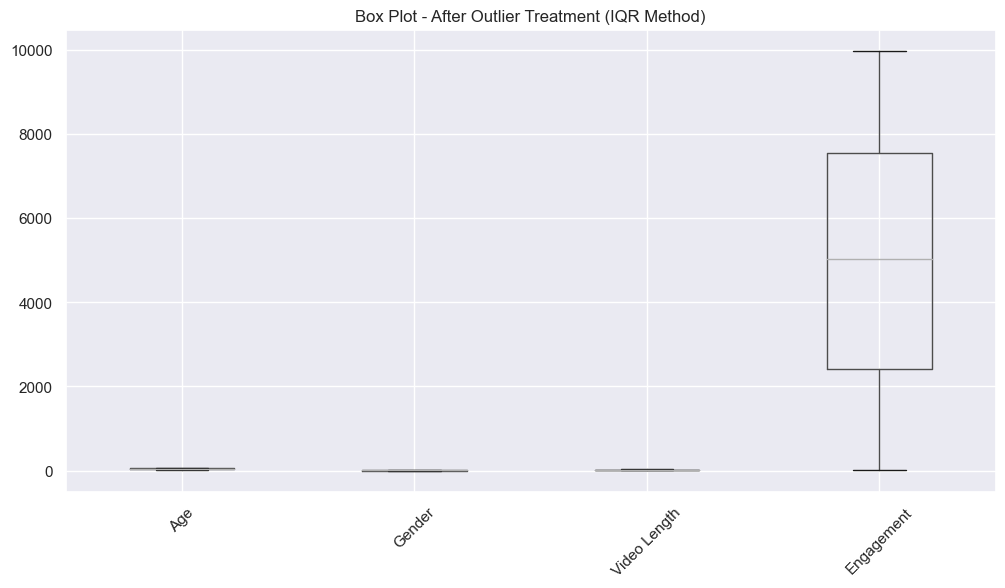

In [142]:
#  Box Plot After Outlier Treatment
plt.figure(figsize=(12, 6))
df[outlier_columns].boxplot()
plt.title("Box Plot - After Outlier Treatment (IQR Method)")
plt.xticks(rotation=45)
plt.show()

# FEATURE ENGINEERING

In [143]:
# Standardize numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [144]:
# Feature Engineering - Apply PCA for Dimensionality Reduction
# Apply PCA to reduce dimensionality to 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df[numerical_features])

# CORRELATION

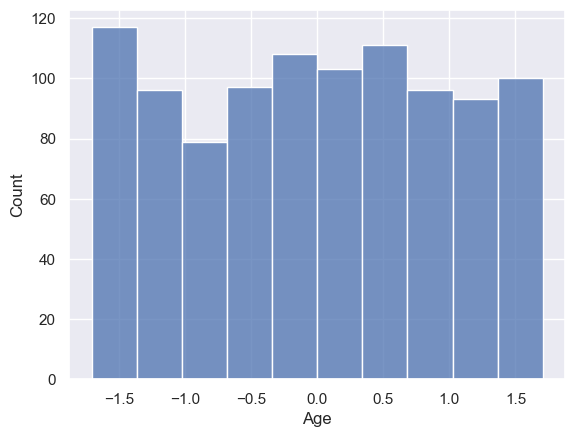

In [145]:
#HISTOGRAM PLOT
sns.histplot(df.Age,bins=10);

# CORRELATION HEAT MAP

Correlation Matrix dataset which measures the linear relationships between different numerical columns in the dataset

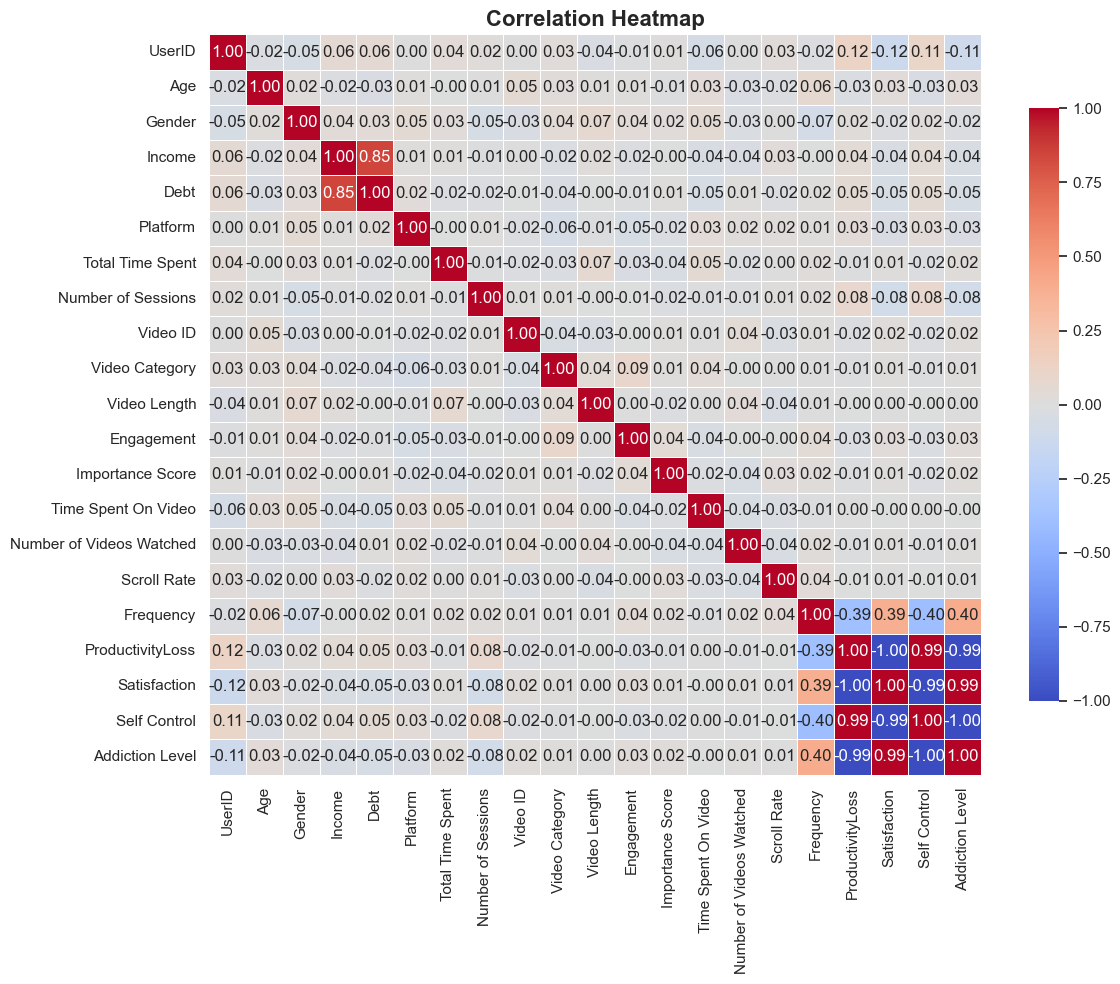

In [146]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the figure with a specific size
plt.figure(figsize=(12, 10))

# Create the heatmap with custom color palette and enhanced styling
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', 
            fmt='.2f', linecolor='white', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Set the title with bold and larger font size
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Adjust the layout to ensure that everything fits well
plt.tight_layout()

# Show the plot
plt.show()

In [147]:
df.corr() 

C:\Users\Dell\AppData\Local\Temp\ipykernel_9940\3514509782.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UserID,Age,Gender,Income,Debt,Owns Property,Platform,Total Time Spent,Number of Sessions,Video ID,...,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Self Control,Addiction Level
UserID,1.000000,-0.024857,-0.050763,0.056221,0.057602,0.080965,0.004688,0.035689,0.022750,0.002670,...,-0.013374,0.009265,-0.055781,0.002627,0.025134,-0.017491,0.117922,-0.117922,0.105280,-0.105280
Age,-0.024857,1.000000,0.018207,-0.017923,-0.034273,-0.024162,0.008138,-0.004166,0.006563,0.047762,...,0.010417,-0.014994,0.034535,-0.033776,-0.018768,0.062539,-0.031068,0.031068,-0.033493,0.033493
Gender,-0.050763,0.018207,1.000000,0.038599,0.031979,0.013704,0.047558,0.027769,-0.048186,-0.034680,...,0.037263,0.023608,0.050266,-0.029074,0.001529,-0.070556,0.017696,-0.017696,0.022084,-0.022084
Income,0.056221,-0.017923,0.038599,1.000000,0.850111,0.009176,0.014110,0.013326,-0.009979,0.003320,...,-0.017183,-0.000762,-0.041666,-0.036211,0.029066,-0.001017,0.040670,-0.040670,0.039181,-0.039181
Debt,0.057602,-0.034273,0.031979,0.850111,1.000000,0.001401,0.024981,-0.019020,-0.018890,-0.006809,...,-0.014255,0.010061,-0.050992,0.011415,-0.016334,0.015156,0.050535,-0.050535,0.052257,-0.052257
Owns Property,0.080965,-0.024162,0.013704,0.009176,0.001401,1.000000,0.040151,-0.023897,0.039172,-0.033874,...,0.021401,0.016391,0.010685,-0.053307,-0.023900,-0.023323,0.045690,-0.045690,0.043949,-0.043949
Platform,0.004688,0.008138,0.047558,0.014110,0.024981,0.040151,1.000000,-0.001793,0.009689,-0.018888,...,-0.050075,-0.023517,0.031651,0.016944,0.018625,0.007825,0.032390,-0.032390,0.034367,-0.034367
Total Time Spent,0.035689,-0.004166,0.027769,0.013326,-0.019020,-0.023897,-0.001793,1.000000,-0.013876,-0.018057,...,-0.033743,-0.043414,0.053319,-0.020969,0.004211,0.015693,-0.014210,0.014210,-0.016086,0.016086
Number of Sessions,0.022750,0.006563,-0.048186,-0.009979,-0.018890,0.039172,0.009689,-0.013876,1.000000,0.010646,...,-0.007600,-0.016832,-0.014127,-0.012761,0.013610,0.022042,0.081461,-0.081461,0.080961,-0.080961
Video ID,0.002670,0.047762,-0.034680,0.003320,-0.006809,-0.033874,-0.018888,-0.018057,0.010646,1.000000,...,-0.003288,0.012940,0.007697,0.043525,-0.026161,0.008224,-0.018680,0.018680,-0.020655,0.020655


In [148]:
correlation = df.select_dtypes(include=['number']).corr()
correlation_volume = correlation['ProductivityLoss'].sort_values(ascending=False)
correlation_volume

ProductivityLoss            1.000000
Self Control                0.994939
UserID                      0.117922
Number of Sessions          0.081461
Debt                        0.050535
Income                      0.040670
Platform                    0.032390
Gender                      0.017696
Time Spent On Video         0.002339
Video Length               -0.004364
Scroll Rate                -0.005351
Video Category             -0.012023
Number of Videos Watched   -0.012161
Importance Score           -0.014161
Total Time Spent           -0.014210
Video ID                   -0.018680
Engagement                 -0.025050
Age                        -0.031068
Frequency                  -0.387609
Addiction Level            -0.994939
Satisfaction               -1.000000
Name: ProductivityLoss, dtype: float64

This heatmap shows the correlation of all the columns or attributes present in the data. The highest correltaion among the variables is of 99% and correlation between Addiction Level and other attributes is mainly negative hence there is not a correlation between these attributes.Self Control have highest correlation around 0.99 i.e. 99%.

# FEATURE SELECTION

In [149]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [150]:
R=df.iloc[:,4:]
t=df.iloc[:,2]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(R,t)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(R.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score').sort_values(by='Score',ascending=False))  

ValueError: could not convert string to float: 'Engineer'

# K-FOLD CROSS VALIDATION

# VISUAL REPRESENTATION

The visuals revealed some useful patterns and distribution.
Other methods: Pair Plot (Scatter Plot
Matrix), Box Plot,  Violin Plot , Swarm Plot,
Density Plot (KDE Plot)

# MODEL TRAINING

# REGRESSION TECHNIQUES

# 1. SIMPLE LINEAR REGRESSION

In [ ]:
#1. Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [151]:
#2. LOAD DATASET (already done above)

In [152]:
#3. Select Features and Target

# Select the feature (X) and target (y)
X = df[['Self Control']]  # Example feature
y = df['ProductivityLoss']  # Target variable


In [153]:
#4. Split the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
# 5. Fit the Model

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [155]:
# 6. Make Predictions

# Make predictions
y_pred = model.predict(X_test)


In [156]:
#7 Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

# Print Results
print("LINEAR REGRESSION RESULTS")
print(f'MSE: {mse}')
print(f'R-squared: {r_squared}')

LINEAR REGRESSION RESULTS
MSE: 0.0175909460415817
R-squared: 0.9847839377754938


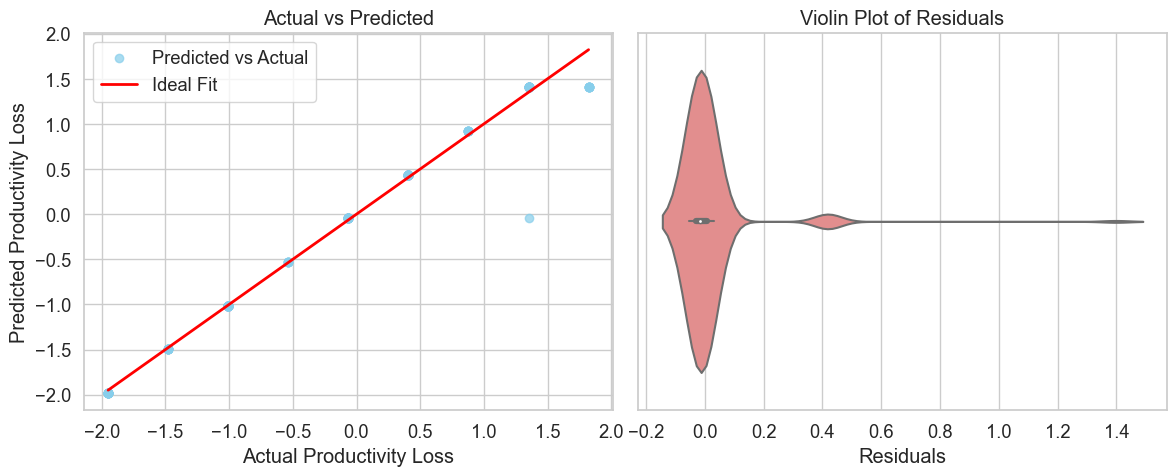

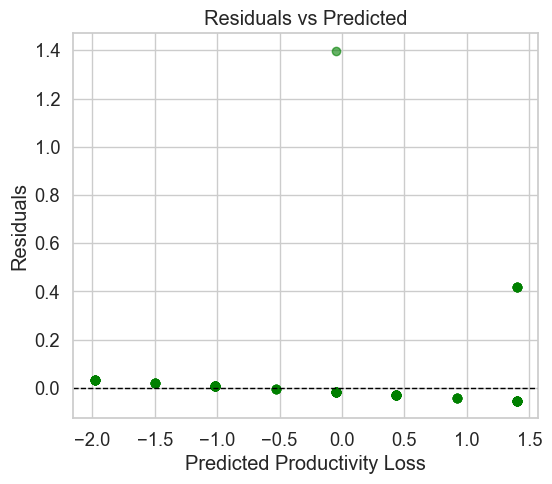

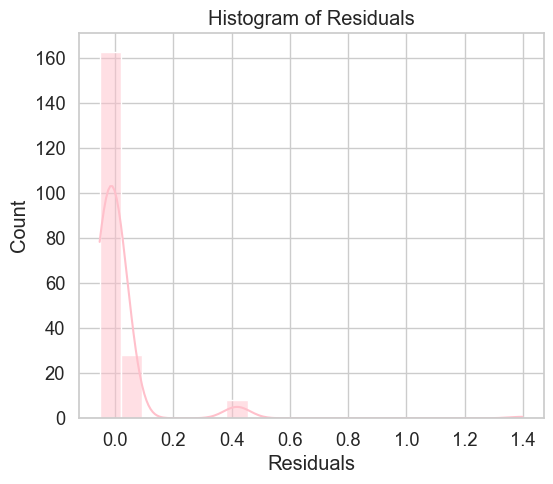

In [157]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Set Visualization Style
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# 3. Example Data Preparation (replace this with your actual dataset)
# Assuming `df` is already defined with 'Self Control' and 'ProductivityLoss'
X = df[['Self Control']]  # Feature
y = df['ProductivityLoss']  # Target

# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Make Predictions
y_pred = model.predict(X_test)

# 7. Calculate Residuals
residuals = y_test - y_pred

# 8. Plot 1: Actual vs Predicted
plt.figure(figsize=(12, 5))

# Subplot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual", color="skyblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Ideal Fit")
plt.title("Actual vs Predicted")
plt.xlabel("Actual Productivity Loss")
plt.ylabel("Predicted Productivity Loss")
plt.legend()

# Subplot 2: Violin Plot of Residuals
plt.subplot(1, 2, 2)
sns.violinplot(x=residuals, color="lightcoral")
plt.title("Violin Plot of Residuals")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

# 9. Plot 2: Residuals vs Predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color="green")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Productivity Loss")
plt.ylabel("Residuals")
plt.show()

# 10. Plot 3: Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals, kde=True, color="pink", bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()


# 2. MULTIPLE LINEAR REGRESSION

In [158]:
#STEP 1: Import Required Libraries: We use the same libraries as in simple regression but apply them to multiple features.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #line imports the train_test_split function
from sklearn.linear_model import LinearRegression     #imports the LinearRegression class
from sklearn.metrics import mean_squared_error        #imports the mean_squared_error function

# computes the Mean Squared Error (MSE), which measures the average squared difference between
# the predicted values and the actual values

In [159]:
#STEP 2: Load Dataset - already done at the beginning

In [160]:
#STEP 3 Select features (independent variables) and target (dependent variable)
# Select numerical columns

X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]   

y = df['ProductivityLoss']

In [161]:
#STEP 4 Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
#STEP 5 Create a linear regression model
model = LinearRegression()

In [163]:
#STEP 6 Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [164]:
#STEP 7 Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [165]:
#STEP 8 Print the results

print("MULTIPLE LINEAR REGRESSION RESULTS")
print(f'Mean Squared Error: {mse}\n')

print(f'R-squared: {r2}\n')

# Optionally, print the coefficients of the model

print('Coefficients:', model.coef_, '\n')

print('Intercept:', model.intercept_)


MULTIPLE LINEAR REGRESSION RESULTS
Mean Squared Error: 0.017640735434795263

R-squared: 0.9847408702506735

Coefficients: [ 0.99514116  0.00203259 -0.0213723   0.00914752 -0.00174795] 

Intercept: 0.010392293130913013


In [166]:
#Mean Squared Error (MSE): Measures average prediction error; lower is better.

#R-squared (R²): Shows how well independent variables explain the dependent variable; closer to 1 is better.

#Coefficients: Indicate the effect of each feature on ProductivityLoss.

#Intercept: Predicts ProductivityLoss when all features are zero.

In [167]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the Dataset

# 3. Explore the Dataset (Optional)
print("Dataset Overview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nCheck for Missing Values:")
print(df.isnull().sum())

# 4. Select Features and Target Variable
# Replace column names with the actual names in your dataset
X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]  # Multiple features
y = df['ProductivityLoss']  # Target variable

# 5. Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create and Train the MLR Model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# 7. Make Predictions on the Test Set
y_pred = mlr_model.predict(X_test)

# 8. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("MULTIPLE LINEAR REGRESSION RESULTS")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print("\nModel Coefficients:")
print(pd.DataFrame({"Feature": X.columns, "Coefficient": mlr_model.coef_}))
print(f"Intercept: {mlr_model.intercept_}")


Dataset Overview:
     UserID       Age    Gender       Location    Income  Debt  Owns Property  \
0 -1.730320  1.112882  0.232696       Pakistan  0.981599     1           True   
1 -1.726856  0.371652 -1.240066         Mexico -1.328813     0           True   
2 -1.723391 -0.666069 -1.240066  United States -0.720282     0           True   
3 -1.719927  1.409373  0.232696         Barzil  0.144948     1          False   
4 -1.716463 -1.184929  0.232696       Pakistan -1.577629     0           True   

      Profession Demographics  Platform  ...  ProductivityLoss  Satisfaction  \
0       Engineer        Rural         1  ...         -1.006976      1.006976   
1         Artist        Urban         1  ...         -0.064115      0.064115   
2       Engineer        Rural         0  ...          0.407316     -0.407316   
3  Waiting staff        Rural         3  ...         -1.006976      1.006976   
4        Manager        Urban         2  ...          1.350177     -1.350177   

      Watch Re

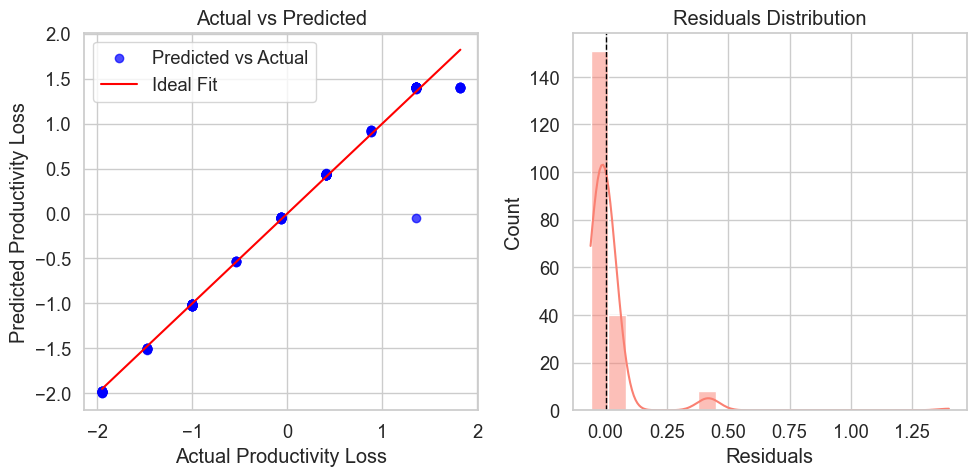

In [168]:
# 9. Visualizations

# (a) Actual vs Predicted Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Ideal Fit')
plt.xlabel("Actual Productivity Loss")
plt.ylabel("Predicted Productivity Loss")
plt.title("Actual vs Predicted")
plt.legend()

# (b) Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='salmon', bins=20)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()


# 3. POLYNOMIAL REGRESSION

POLYNOMIAL REGRESSION RESULTS
Mean Squared Error: 0.017449034504534007
R-squared: 0.9849066903990871
Coefficients: [ 0.00000000e+00  1.01785704e+00  6.13908720e-03 -2.38029556e-02
  5.01042504e-02 -1.28445975e-02  2.32359445e-02  5.14499963e-05
 -3.27924402e-02  1.49247406e-02 -1.04158778e-03  6.25427111e-03
 -7.72327824e-03 -4.11149396e-04 -8.43157991e-03 -2.38029556e-02
 -6.25774478e-02  1.83016248e-02  1.04063472e-02 -7.12681826e-03
  7.57777391e-04]
Intercept: 0.012388007627771497


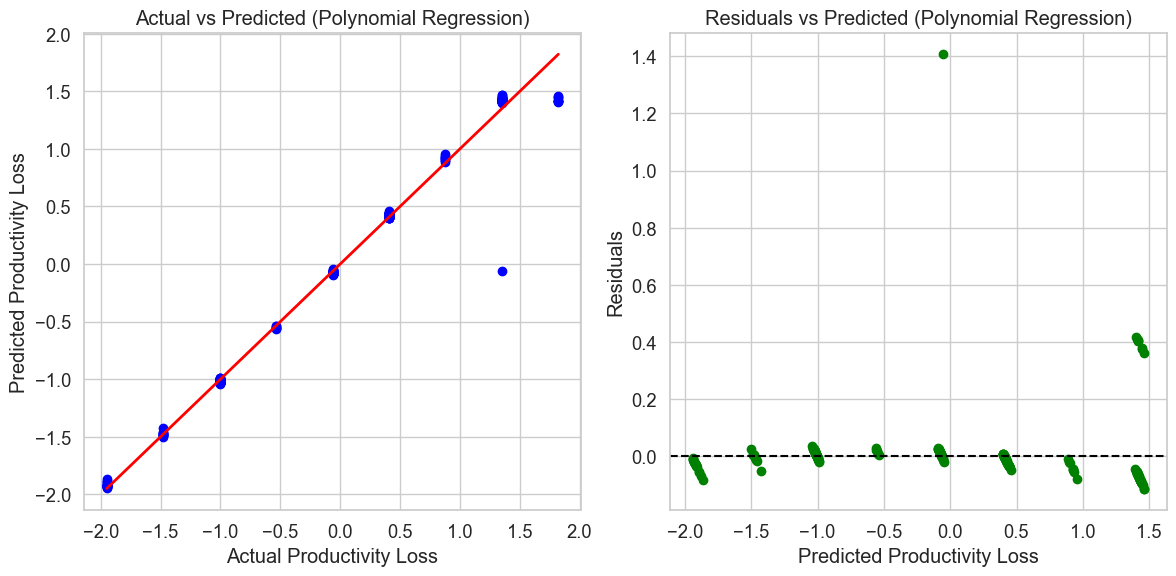

In [169]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures  # For polynomial feature transformation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Step 2: Prepare the data
X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]  # Features
y = df['ProductivityLoss']  # Target variable

# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply Polynomial Feature Transformation
# Let's apply polynomial features (degree=2, you can try higher degrees)
poly = PolynomialFeatures(degree=2)  # Try degree=2 for quadratic, higher for more complex curves
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Step 5: Create and Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Step 6: Make predictions on the test data
y_pred = model.predict(X_poly_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("POLYNOMIAL REGRESSION RESULTS")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Optionally, print the coefficients of the polynomial model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Step 8: Visualize the Actual vs Predicted plot
plt.figure(figsize=(12, 6))

# Plotting Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Ideal fit line
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.xlabel('Actual Productivity Loss')
plt.ylabel('Predicted Productivity Loss')

# Plotting the residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')  # Zero residual line
plt.title('Residuals vs Predicted (Polynomial Regression)')
plt.xlabel('Predicted Productivity Loss')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


# 4. DECISION TREE REGRESSION

Decision Tree Regression Results:
Mean Squared Error: 0.0255583726561861
R-squared: 0.9778921618101514


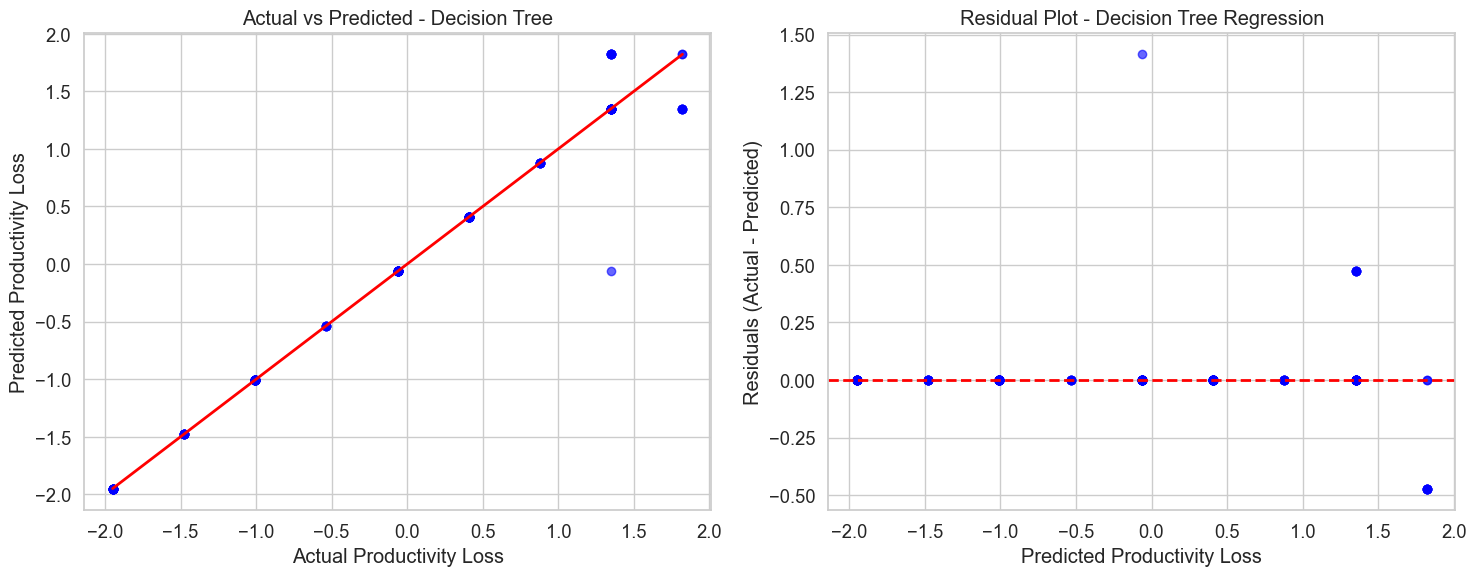

In [170]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Select features and target
X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]  # Example features
y = df['ProductivityLoss']  # Target variable

# 3. Split the Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# 5. Train the model
dt_regressor.fit(X_train, y_train)

# 6. Make predictions
y_pred = dt_regressor.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Print results
print("Decision Tree Regression Results:")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 1. Create subplots to display both plots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# 2. Actual vs Predicted Plot
axes[0].scatter(y_test, y_pred, color='blue', alpha=0.6)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Ideal fit line
axes[0].set_title('Actual vs Predicted - Decision Tree')
axes[0].set_xlabel('Actual Productivity Loss')
axes[0].set_ylabel('Predicted Productivity Loss')

# 3. Residual Plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, color='blue', alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at 0 to represent no error
axes[1].set_title('Residual Plot - Decision Tree Regression')
axes[1].set_xlabel('Predicted Productivity Loss')
axes[1].set_ylabel('Residuals (Actual - Predicted)')

# 4. Adjust layout for better visibility
plt.tight_layout()
plt.show()




                        Model       MSE  R-squared
0    Simple Linear Regression  0.017591   0.984784
1  Multiple Linear Regression  0.017641   0.984741
2       Polynomial Regression  0.017146   0.985169
3    Decision Tree Regression  0.025558   0.977892


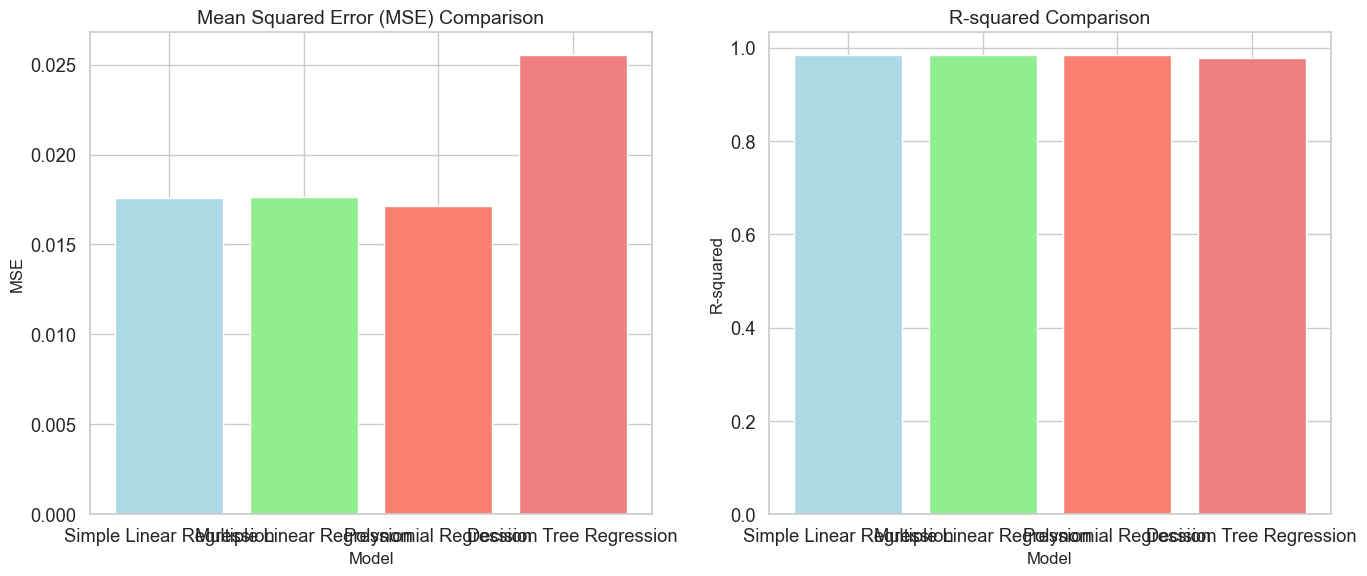

In [171]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Example data (replace with your actual dataset)
X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]  # Replace with your features
y = df['ProductivityLoss']  # Replace with your target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
slr_model = LinearRegression()
mlr_model = LinearRegression()
poly_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

# Step 4: Fit the models
slr_model.fit(X_train[['Self Control']], y_train)  # For SLR, use one feature
mlr_model.fit(X_train, y_train)  # For MLR, use all features
poly = PolynomialFeatures(degree=3)  # Polynomial Regression degree=3
X_train_poly = poly.fit_transform(X_train[['Self Control']])
X_test_poly = poly.transform(X_test[['Self Control']])
poly_model.fit(X_train_poly, y_train)
dt_model.fit(X_train, y_train)  # Decision Tree using all features

# Step 5: Make predictions
slr_pred = slr_model.predict(X_test[['Self Control']])
mlr_pred = mlr_model.predict(X_test)
poly_pred = poly_model.predict(X_test_poly)
dt_pred = dt_model.predict(X_test)

# Step 6: Calculate MSE and R-squared for each model
slr_mse = mean_squared_error(y_test, slr_pred)
mlr_mse = mean_squared_error(y_test, mlr_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

slr_r2 = r2_score(y_test, slr_pred)
mlr_r2 = r2_score(y_test, mlr_pred)
poly_r2 = r2_score(y_test, poly_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Step 7: Store results in a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression'],
    'MSE': [slr_mse, mlr_mse, poly_mse, dt_mse],
    'R-squared': [slr_r2, mlr_r2, poly_r2, dt_r2]
})

# Step 8: Display the comparison table
print(comparison_df)

# Step 9: Define colors for each model
colors = {
    'Simple Linear Regression': 'lightblue',
    'Multiple Linear Regression': 'lightgreen',
    'Polynomial Regression': 'salmon',
    'Decision Tree Regression': 'lightcoral'
}

# Step 10: Plot Bar Chart for MSE and R-squared comparison with attractive colors
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MSE Bar Chart with unique colors for each model
axes[0].bar(comparison_df['Model'], comparison_df['MSE'], color=[colors[model] for model in comparison_df['Model']])
axes[0].set_title('Mean Squared Error (MSE) Comparison', fontsize=14)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('MSE', fontsize=12)

# R-squared Bar Chart with unique colors for each model
axes[1].bar(comparison_df['Model'], comparison_df['R-squared'], color=[colors[model] for model in comparison_df['Model']])
axes[1].set_title('R-squared Comparison', fontsize=14)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('R-squared', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


             Model       MSE  R-squared
0              SLR  0.017591   0.984784
1              MLR  0.017641   0.984741
2     Polynomial R  0.017146   0.985169
3  Decision Tree R  0.025558   0.977892


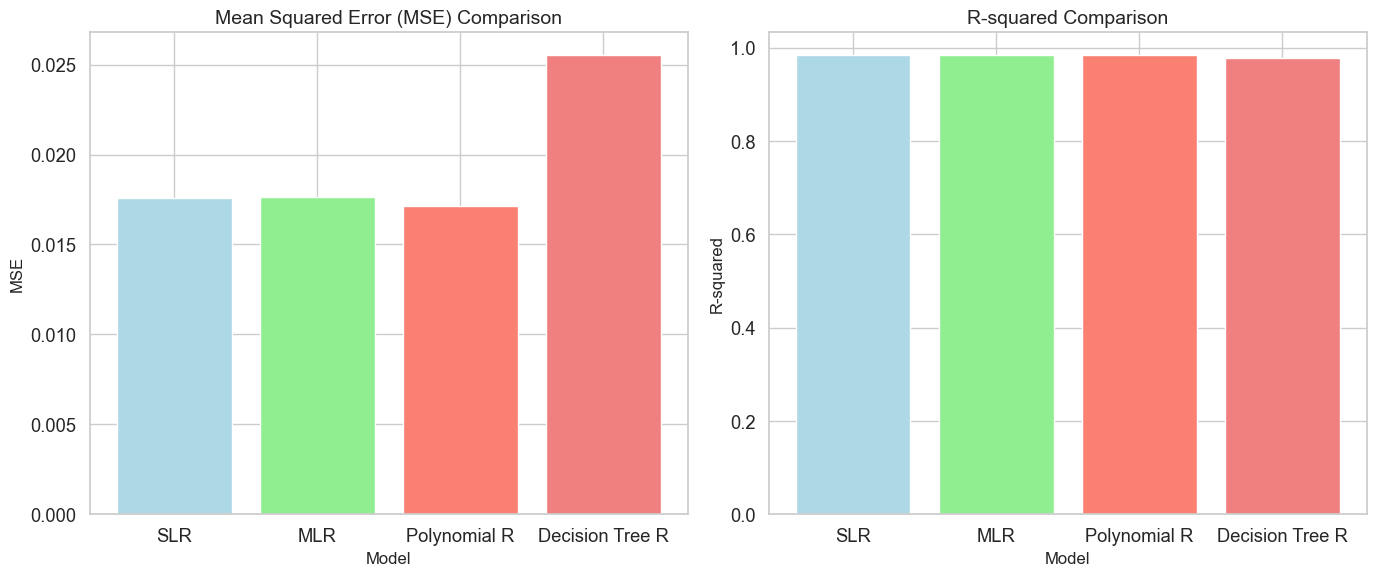

In [174]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Example data (replace with your actual dataset)
X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]  # Replace with your features
y = df['ProductivityLoss']  # Replace with your target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
slr_model = LinearRegression()
mlr_model = LinearRegression()
poly_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

# Step 4: Fit the models
slr_model.fit(X_train[['Self Control']], y_train)  # For SLR, use one feature
mlr_model.fit(X_train, y_train)  # For MLR, use all features
poly = PolynomialFeatures(degree=3)  # Polynomial Regression degree=3
X_train_poly = poly.fit_transform(X_train[['Self Control']])
X_test_poly = poly.transform(X_test[['Self Control']])
poly_model.fit(X_train_poly, y_train)
dt_model.fit(X_train, y_train)  # Decision Tree using all features

# Step 5: Make predictions
slr_pred = slr_model.predict(X_test[['Self Control']])
mlr_pred = mlr_model.predict(X_test)
poly_pred = poly_model.predict(X_test_poly)
dt_pred = dt_model.predict(X_test)

# Step 6: Calculate MSE and R-squared for each model
slr_mse = mean_squared_error(y_test, slr_pred)
mlr_mse = mean_squared_error(y_test, mlr_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

slr_r2 = r2_score(y_test, slr_pred)
mlr_r2 = r2_score(y_test, mlr_pred)
poly_r2 = r2_score(y_test, poly_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Step 7: Store results in a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Model': ['SLR', 'MLR', 'Polynomial R', 'Decision Tree R'],
    'MSE': [slr_mse, mlr_mse, poly_mse, dt_mse],
    'R-squared': [slr_r2, mlr_r2, poly_r2, dt_r2]
})

# Step 8: Display the comparison table
print(comparison_df)

# Step 9: Define colors for each model
colors = {
    'SLR': 'lightblue',
    'MLR': 'lightgreen',
    'Polynomial R': 'salmon',
    'Decision Tree R': 'lightcoral'
}

# Step 10: Plot Bar Chart for MSE and R-squared comparison with attractive colors
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MSE Bar Chart with unique colors for each model
axes[0].bar(comparison_df['Model'], comparison_df['MSE'], color=[colors[model] for model in comparison_df['Model']])
axes[0].set_title('Mean Squared Error (MSE) Comparison', fontsize=14)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('MSE', fontsize=12)

# R-squared Bar Chart with unique colors for each model
axes[1].bar(comparison_df['Model'], comparison_df['R-squared'], color=[colors[model] for model in comparison_df['Model']])
axes[1].set_title('R-squared Comparison', fontsize=14)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('R-squared', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


# 5.  Decision Tree REGRESSOR

Mean Squared Error (MSE): 0.0200
R-squared: 0.9817


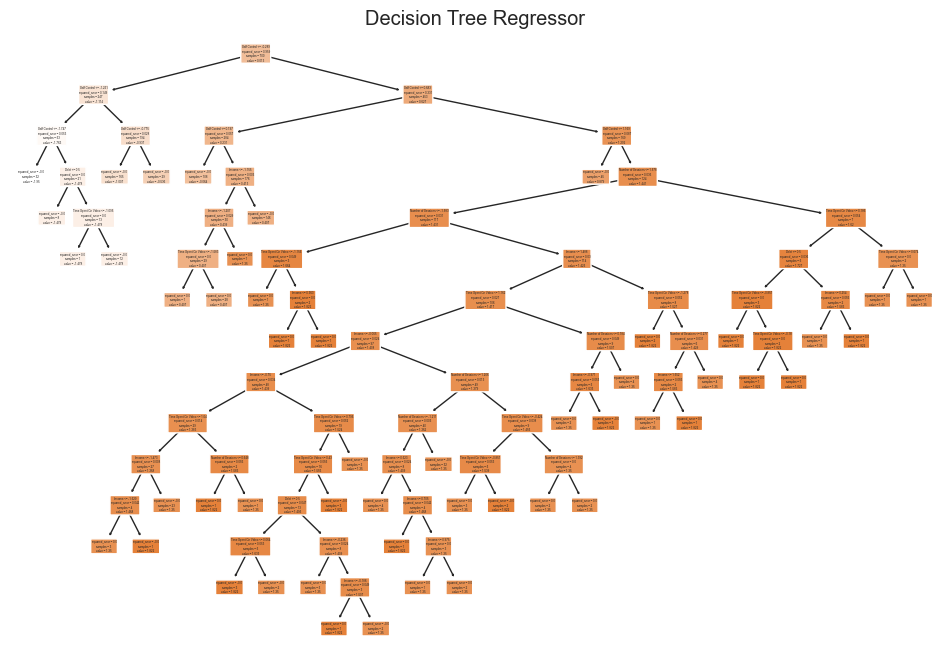

In [177]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Step 2: Load your dataset (ensure you load your dataset before)
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset

# Assuming your dataset has 'ProductivityLoss' as the target and other columns as features
X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]  # Features
y = df['ProductivityLoss']  # Target column (ProductivityLoss)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create and train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Step 7: Visualize the decision tree (optional)
plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()


# 6. RANDOM FOREST REGRESSION

Mean Squared Error: 0.020042653590262343
R-squared: 0.982663225533592


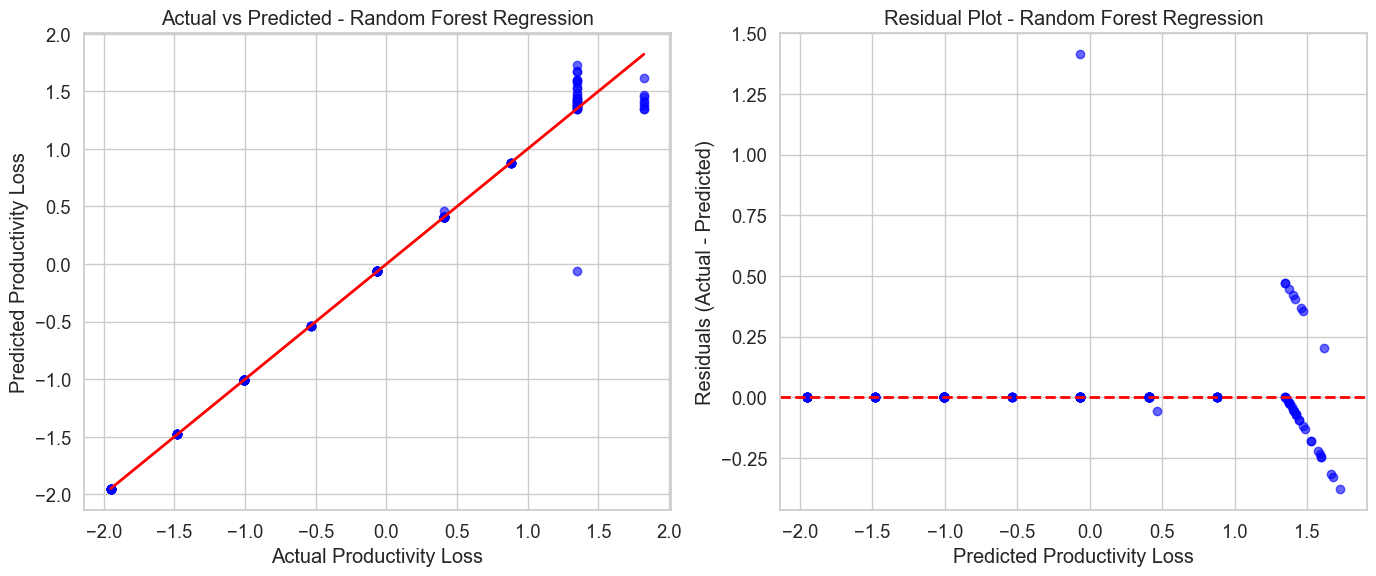

In [179]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset (Assuming 'df' is your dataset)
# Ensure that you have your features (X) and target (y) defined
X = df[['Self Control', 'Number of Sessions', 'Debt', 'Income', 'Time Spent On Video']]  # Example features
y = df['ProductivityLoss']  # Target variable

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Fit the model on the training data
model.fit(X_train, y_train)

# Step 6: Make Predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Step 8: Print the Results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

#Step 9: Plot Actual vs Predicted and Residuals Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create two subplots side by side

# 1. Actual vs Predicted Plot
axes[0].scatter(y_test, y_pred, color='blue', alpha=0.6)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Ideal fit line
axes[0].set_title('Actual vs Predicted - Random Forest Regression')
axes[0].set_xlabel('Actual Productivity Loss')
axes[0].set_ylabel('Predicted Productivity Loss')

# 2. Residual Plot
residuals = y_test - y_pred  # Calculate residuals
axes[1].scatter(y_pred, residuals, color='blue', alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at 0 (no error)
axes[1].set_title('Residual Plot - Random Forest Regression')
axes[1].set_xlabel('Predicted Productivity Loss')
axes[1].set_ylabel('Residuals (Actual - Predicted)')

# Display the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()
